In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import Stats

## Renyi entropy $S_{2}$ from MC simulation

In [2]:
N = 20
#aspect ratio Ly/Lx
rs = np.linspace(0.8, 1.2, 5, endpoint=True)
#non-thermal iterations
M0 = 1e5

In [40]:
Ns = N
Lxs = np.sqrt(2*np.pi*Ns/rs)
Lys = Lxs*rs

S2 = np.zeros(rs.size)
err = np.zeros(rs.size)

for i in range(rs.size):
    p = np.real(np.loadtxt(f"IQHE_entropy_results/N_{N}/p_N_{N}_r_{rs[i]:.2f}.dat", dtype=complex))
    p = p[M0:]
    mean_p, std_p = Stats(p)
    var_p = std_p**2/(p.size)
    
    mod = np.real(np.loadtxt(f"IQHE_entropy_results/N_{N}/mod_N_{N}_r_{rs[i]:.2f}.dat", dtype=complex))
    mod = mod[M0:]
    mean_mod, std_mod = Stats(mod)
    var_mod = std_mod**2/(mod.size)
    
    sign = np.loadtxt(f"IQHE_entropy_results/N_{N}/sign_N_{N}_r_{rs[i]:.2f}.dat", dtype=complex)
    sign = sign[M0:]
    mean_sign, std_sign = Stats(sign)

    print(mean_p, mean_mod, mean_sign)
    mean_sign = np.abs(mean_sign)
    std_sign = np.real(std_sign)
    
    var_sign = std_sign**2/(sign.size)

    #S2[i] = -np.log(mean_p*mean_mod*mean_sign)
    #err[i] = np.sqrt(var_p/(mean_p**2) + var_mod/(mean_mod**2) + var_sign/(mean_sign**2))

    S2[i] = -np.log(mean_p*mean_mod)
    err[i] = np.sqrt(var_p/(mean_p**2) + var_mod/(mean_mod**2))

0.236275 0.023832967241078057 (-0.013691468478238693-0.008747797709656021j)
0.24505 0.030511499922687785 (-0.006365760115035807-0.01320070807555134j)
0.260225 0.043828151546798755 (0.011280851982234684+0.01595719085303015j)
0.265975 0.05775650581158386 (0.012846860793865484-0.01831550745520517j)
0.2568 0.038866603003408606 (-0.009933660161356484-0.007476270263916283j)


In [5]:
rs = np.array([1])
for i in range(rs.size):
    sign = np.loadtxt(f"IQHE_entropy_results/N_{N}/sign_N_{N}_r_{rs[i]:.2f}.dat", dtype=complex)
    sign = sign[100000:]
    print(sign.size)
    print(f"aspect ratio = {rs[i]}")
    mean_real, std_real = Stats(np.real(sign))
    print(f"sign.real = {mean_real} +- {std_real/np.sqrt(sign.size)}")
    mean_imag, std_imag = Stats(np.imag(sign))
    print(f"sign.imag = {mean_imag} +- {std_imag/np.sqrt(sign.size)}")

900000
aspect ratio = 1
sign.real = 0.0023466109909612664 +- 0.0007448455708488797
sign.imag = -0.0026649919780786296 +- 0.0007458575008085031


In [41]:
S2

array([5.17944438, 4.89594463, 4.47368758, 4.17587224, 4.60707764])

In [42]:
err

array([0.02816874, 0.04523149, 0.04426884, 0.04164404, 0.03567363])

<ErrorbarContainer object of 3 artists>

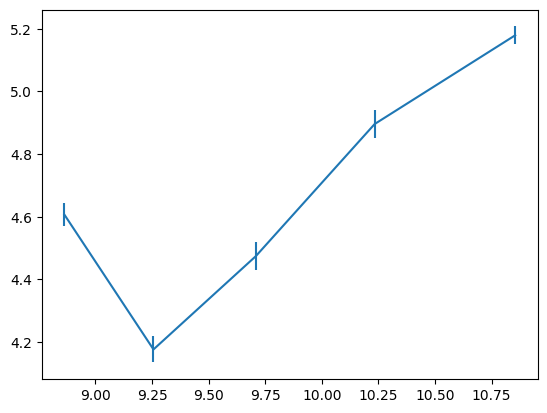

In [43]:
plt.errorbar(Lxs, S2, err)

In [22]:
Lxs

array([8.86226925, 8.35542758, 7.9266546 , 7.55776861, 7.23601255])